In [6]:
from sage.combinat.tiling import TilingSolver, Polyomino
hexominos = [[[0, 0], [0, -1], [0, -2], [-1, -2], [1, 0], [1, 1]], [[0, 0], [0, -1], [-1, -1], [-2, -1], [1, 0], [2, 0]], [[0, 0], [0, -1], [-1, -1], [-1, -2], [1, 0], [1, 1]], [[0, 0], [0, -1], [0, -2], [0, 1], [-1, 0], [1, 0]], [[0, 0], [0, -1], [-1, -1], [1, -1], [0, 1], [0, 2]], [[0, 0], [0, -1], [0, -2], [-1, -1], [0, 1], [1, 0]], [[0, 0], [0, -1], [0, -2], [-1, -2], [0, 1], [1, 1]], [[0, 0], [0, -1], [0, -2], [-1, -1], [0, 1], [1, 1]], [[0, 0], [0, -1], [0, -2], [-1, 0], [-1, 1], [1, 0]], [[0, 0], [0, -1], [0, -2], [0, 1], [-1, 1], [1, 0]], [[0, 0], [0, -1], [0, -2], [-1, -1], [1, 0], [1, 1]]]
H = [Polyomino(_, 'blue') for _ in hexominos]

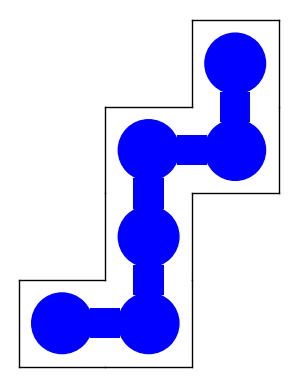

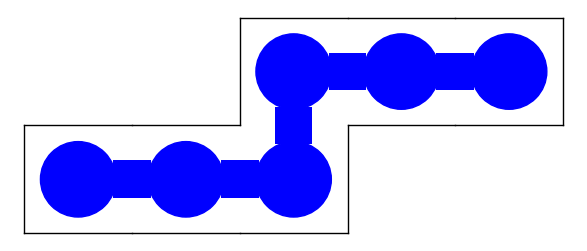

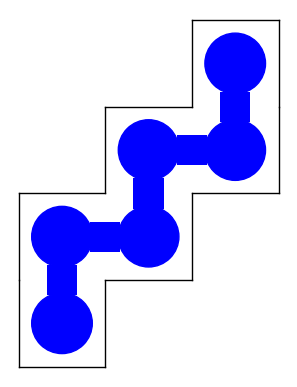

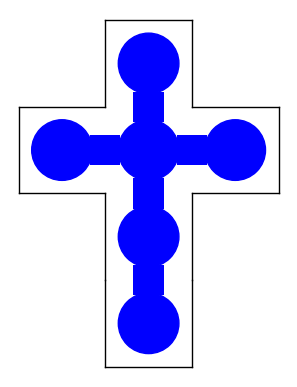

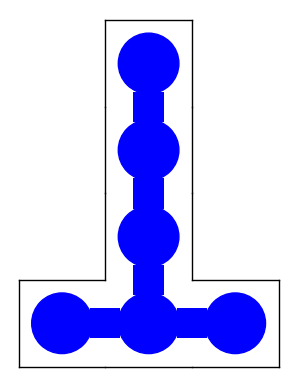

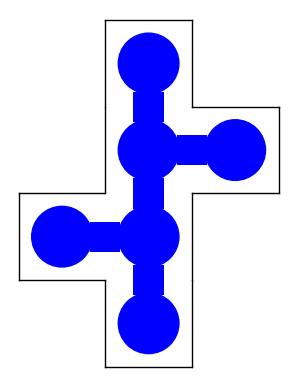

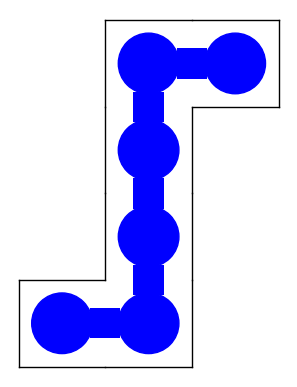

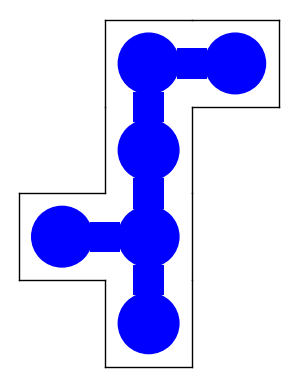

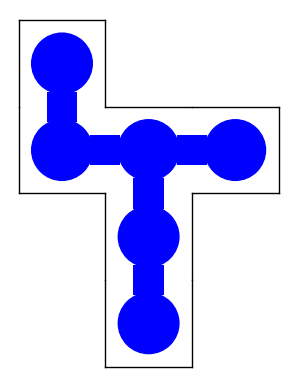

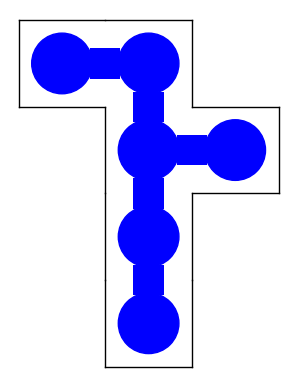

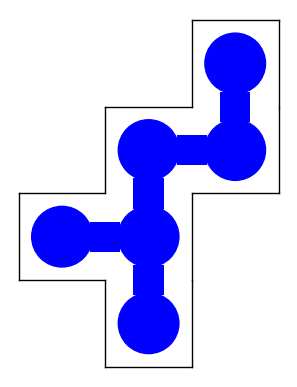

In [13]:
for P in H:
    P.show2d().show(axes=False)

In [31]:
def milp(self, solver=None):
    tiles = {}
    for P in self.pieces():
        tiles[P.frozenset()] = [Q.frozenset() for Q in P.isometric_copies(self._box, orientation_preserving=not(self._reflection))]
    
    p = MixedIntegerLinearProgram(solver=solver)
    x = p.new_variable(binary=True)
    for i in self.space():
        p.add_constraint(p.sum(x[T, P]  for T in tiles for P in tiles[T] if i in P) <= 1) 
    for T in tiles:
        p.add_constraint(p.sum(x[T, P] for P in tiles[T]) <= 1)
    p.set_objective(p.sum(x.values()))
    
    return p, x

9.0


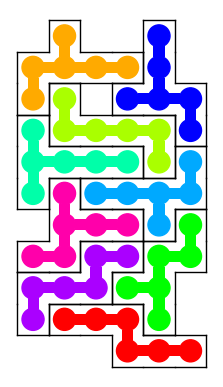

In [32]:
b, c = 6, 11
T = TilingSolver(H, box=[b,c], reflection=True)
p, x  = milp(T)
print p.solve()
solu = set()
for Q, P in x.keys():
    if p.get_values(x[Q, P]) == 1:
        solu.add(P)
bild = sum(Polyomino(_, color=rainbow(len(solu))[i]).show2d() for i, _ in enumerate(solu))
bild.show(axes=false)